In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
df=pd.read_csv('heart.csv')

In [74]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [75]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [76]:
df['thal'].value_counts()

thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

In [77]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [78]:
df['thal'].replace(0,np.nan,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3712\1032589316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thal'].replace(0,np.nan,inplace=True)


In [79]:
mode_value=df['thal'].mode()[0]
df['thal'].fillna(mode_value,inplace=True)

In [80]:
df['thal'].value_counts()

thal
2.0    551
3.0    410
1.0     64
Name: count, dtype: int64

In [81]:
df['fbs'].value_counts()

fbs
0    872
1    153
Name: count, dtype: int64

In [82]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [83]:
X = df.drop('target', axis=1)
y = df['target']

In [84]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [87]:
# Predictions
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



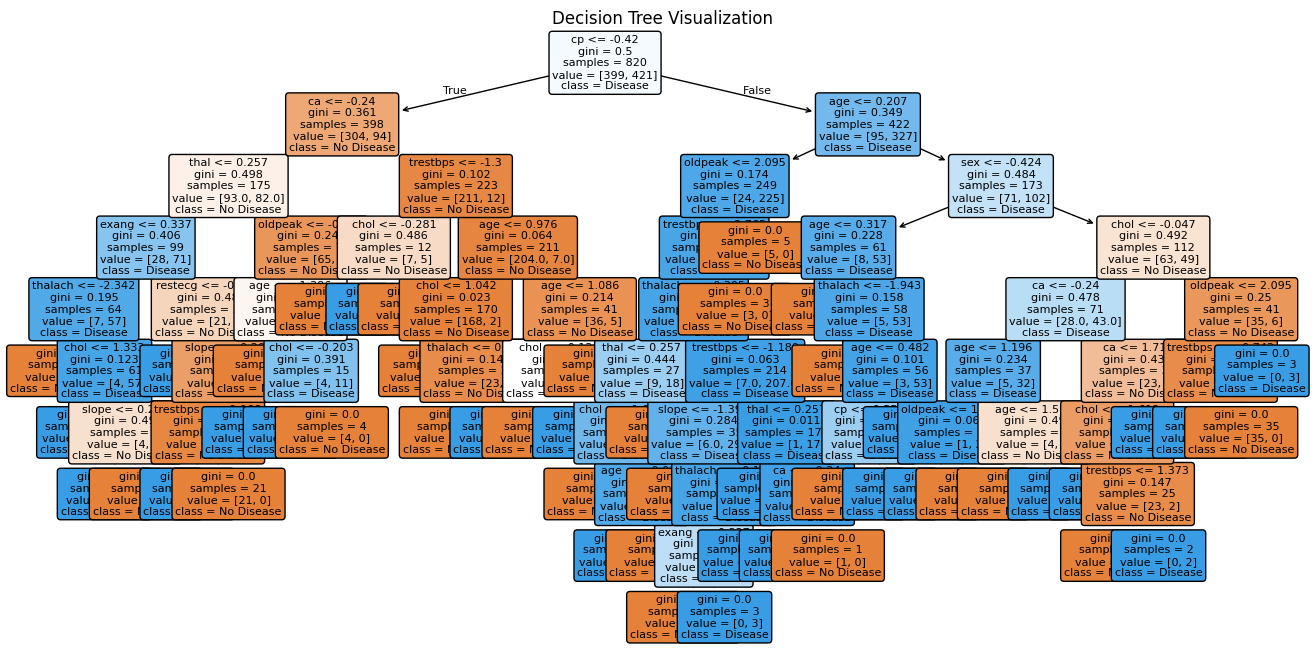

In [88]:
# Visualize the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'],
          filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

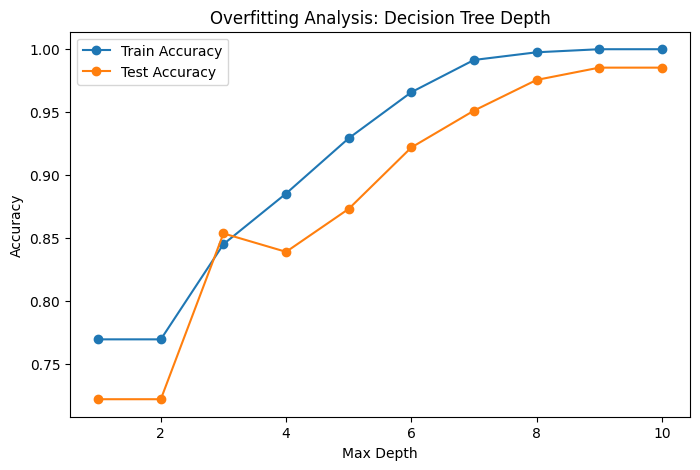

Best Tree Depth: 9


In [89]:

#  Analyze Overfitting by Controlling Tree Depth

train_acc = []
test_acc = []
depths = range(1, 11)

for d in depths:
    dt_temp = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_temp.fit(X_train_scaled, y_train)
    train_acc.append(dt_temp.score(X_train_scaled, y_train))
    test_acc.append(dt_temp.score(X_test_scaled, y_test))

plt.figure(figsize=(8, 5))
plt.plot(depths, train_acc, marker='o', label='Train Accuracy')
plt.plot(depths, test_acc, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Decision Tree Depth')
plt.legend()
plt.show()
# Choose optimal depth (where test accuracy stabilizes)
best_depth = depths[np.argmax(test_acc)]
print("Best Tree Depth:", best_depth)

In [90]:
#  Train a Random Forest and Compare Accuracy

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
 

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3712\93355418.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


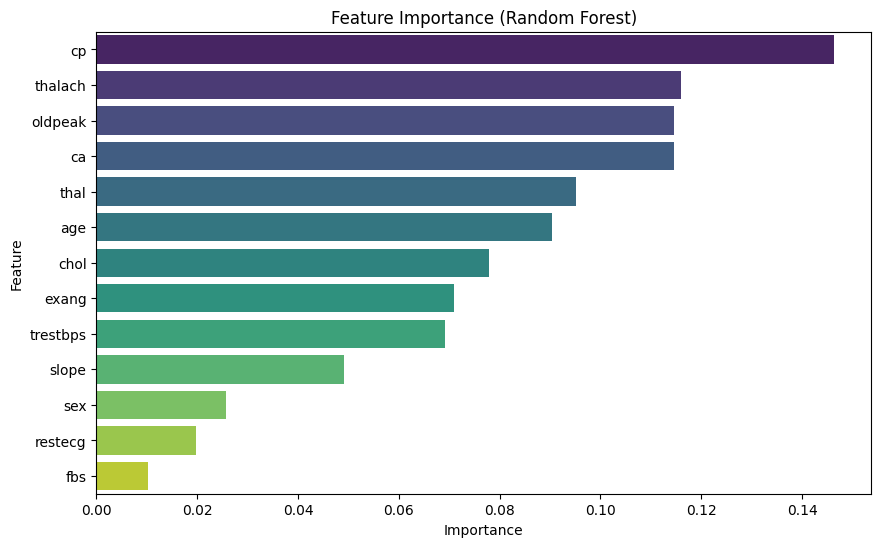

     Feature  Importance
2         cp    0.146392
7    thalach    0.116029
9    oldpeak    0.114602
11        ca    0.114510
12      thal    0.095199
0        age    0.090466
4       chol    0.077858
8      exang    0.070888
3   trestbps    0.069213
10     slope    0.049160
1        sex    0.025641
6    restecg    0.019783
5        fbs    0.010258


In [91]:
# Interpret Feature Importances
import seaborn as sns
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()

print(importances)

In [92]:

# Evaluate Using Cross-Validation
cv_scores_dt = cross_val_score(dt, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("\nDecision Tree CV Accuracy:", np.mean(cv_scores_dt))
print("Random Forest CV Accuracy:", np.mean(cv_scores_rf))


Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073


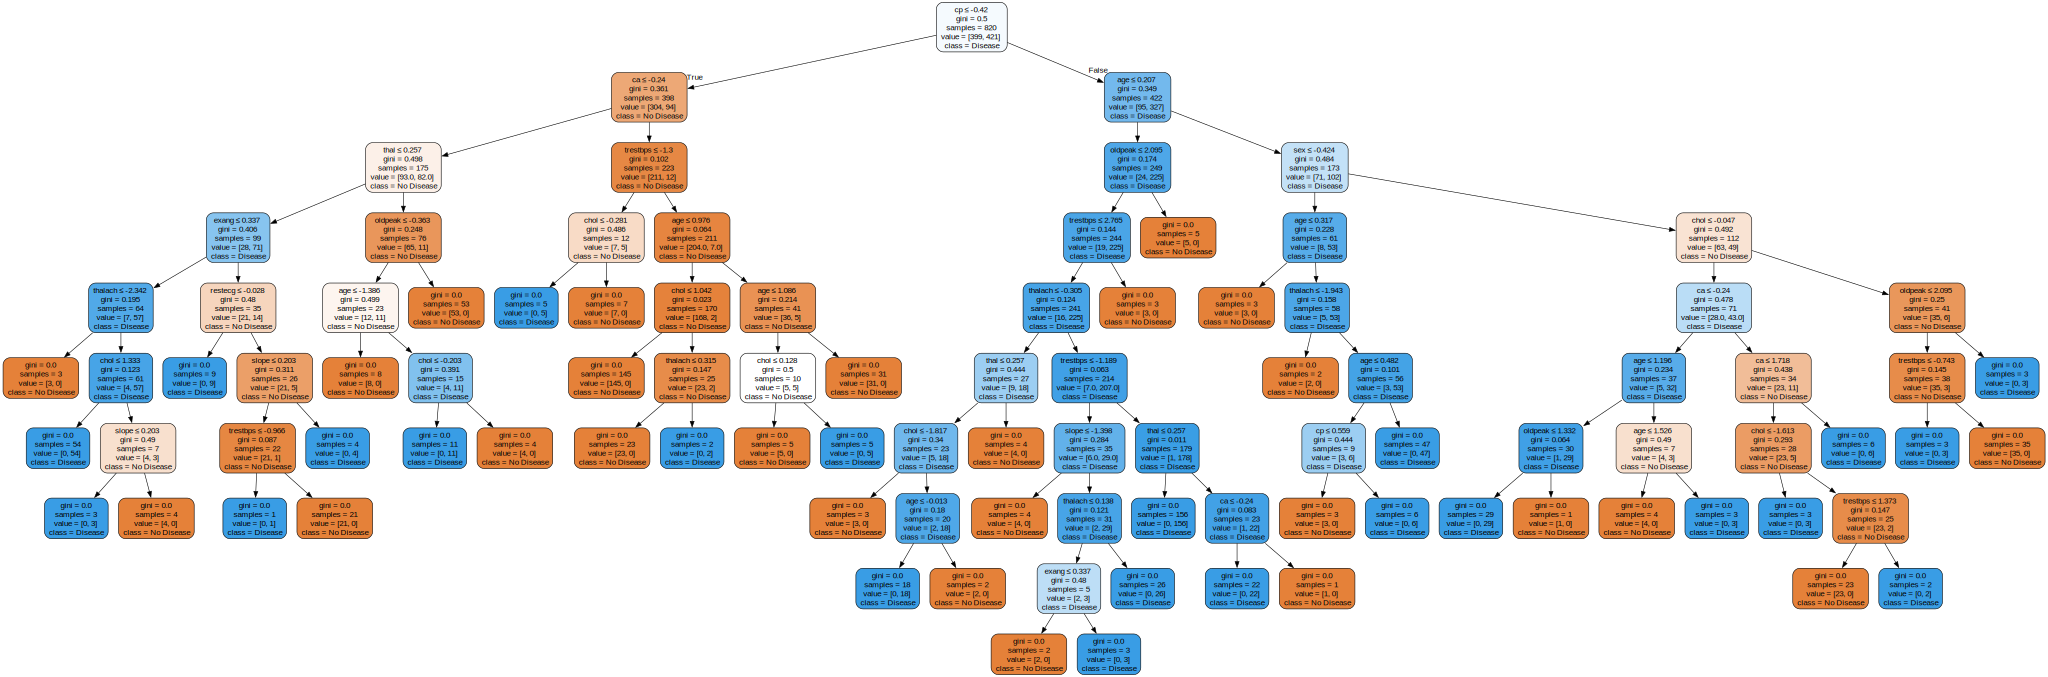

In [93]:
from sklearn.tree import export_graphviz
import graphviz

# Export as DOT data
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True, rounded=True,
    special_characters=True
)

# Visualize the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree_heart")  # saves as decision_tree_heart.pdf
graph


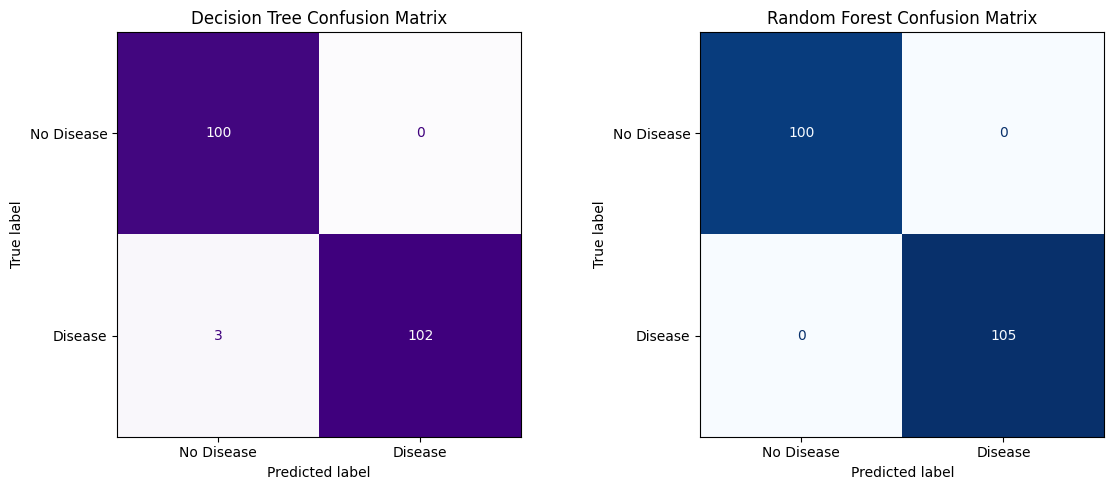

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrices for both models
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['No Disease', 'Disease'])
disp_dt.plot(cmap='Purples', ax=axes[0], colorbar=False)
axes[0].set_title("Decision Tree Confusion Matrix")

# Random Forest confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Disease', 'Disease'])
disp_rf.plot(cmap='Blues', ax=axes[1], colorbar=False)
axes[1].set_title("Random Forest Confusion Matrix")

# Adjust layout
plt.tight_layout()
plt.show()
